In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (13,5)

pd.set_option('display.max_rows', None)


In [2]:
#Load data
df = pd.read_csv(r'C:\Users\lukek\Documents\Analytics\Movie Project\movies.csv')

In [3]:
#inspect for nulls
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#Crude cleaning
df = df.dropna()

In [5]:
#re-inspect for nulls
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
#get datatypes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#casting datatypes
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
#create column for correct year
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [9]:
#order by gross revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [22]:
#check for dups
dup = df.duplicated(subset=None, keep='first')
dup[(dup)==True]

Series([], dtype: bool)

<function matplotlib.pyplot.show(close=None, block=None)>

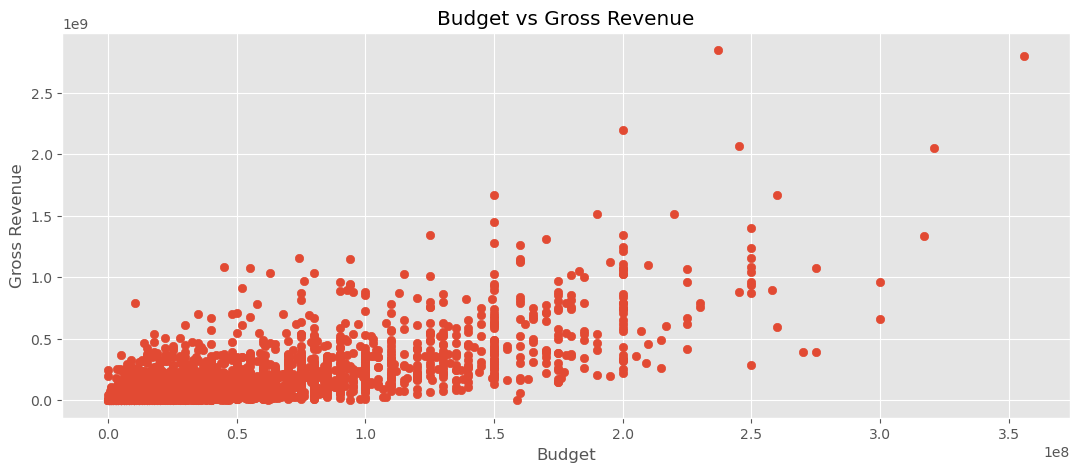

In [11]:
#view hypothesized correlation
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.ylabel('Gross Revenue')
plt.xlabel('Budget')

plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

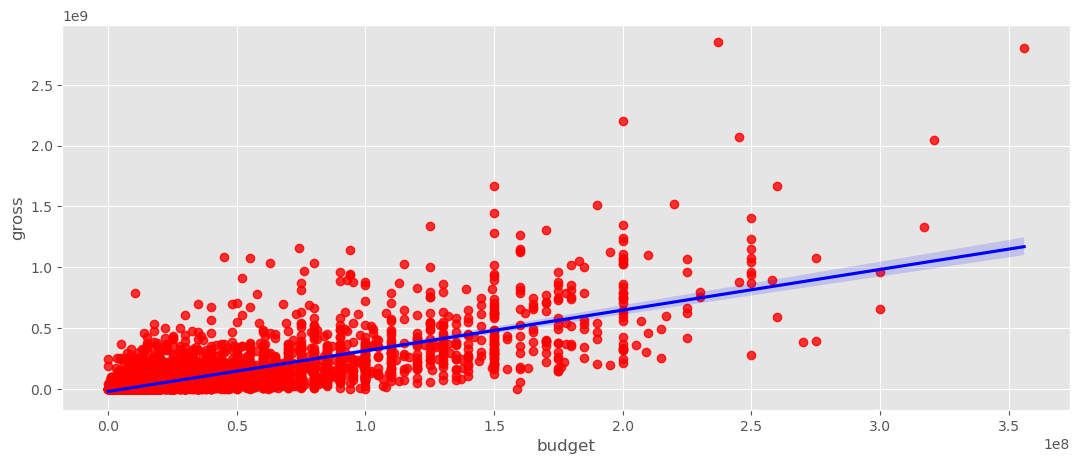

In [12]:
#line of best fit
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [13]:
#look for correlation
df.corr() # =0.7402

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


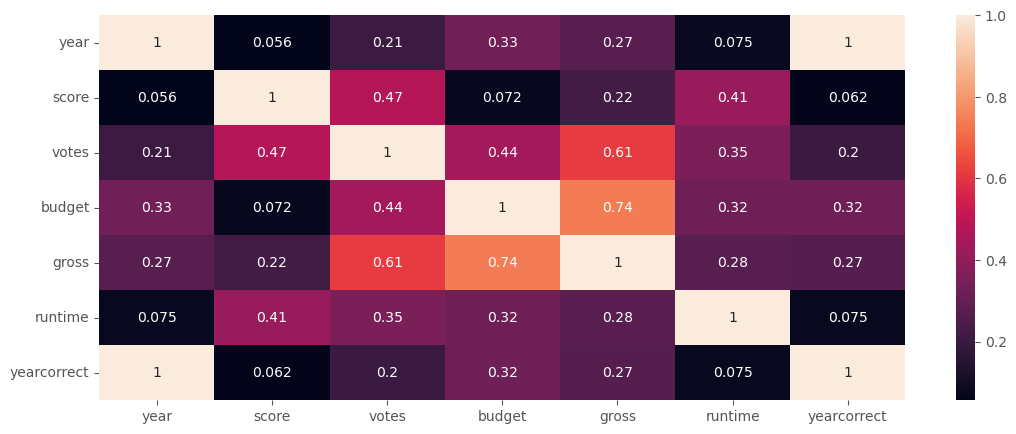

In [14]:
#visualize correlation
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [15]:
#convert categorical data to numbers
df_convert = df

for col_name in df_convert.columns:
  if(df_convert[col_name].dtype == 'object'):
    df_convert[col_name] = df_convert[col_name].astype('category')
    df_convert[col_name] = df_convert[col_name].cat.codes

df_convert.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


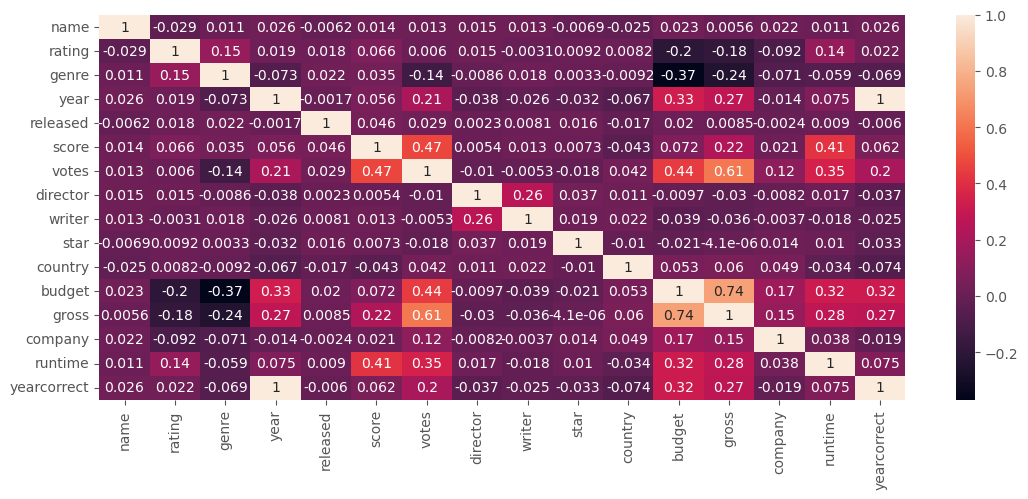

In [16]:
#new matrix with all columns
correlation_matrix2 = df_convert.corr()

sns.heatmap(correlation_matrix2, annot=True)

plt.show()

In [ ]:
corr_mat = df_convert.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

In [ ]:
sort_pairs = corr_pairs.sort_values()
sort_pairs

In [19]:
#find & filter high correlations
high_corr = sort_pairs[((sort_pairs) > 0.5) & ((sort_pairs) != 1)]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
dtype: float64

In [20]:
# votes and budget correlate with gross revenue
